# Image Classifier Project

# Part 1: Data Exploration

In [2]:
import numpy as np
import pandas as pd

In [30]:
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    df = dict(npz_file.items())

In [31]:
df.keys()

dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])

In [61]:
X = df['overfeat']
X.shape

(5000, 4096)

In [62]:
y = df['labels']
print(y.shape)
np.unique(y)

(5000,)


array([0, 1, 2, 3])

In [63]:
class_proportion = []
for k in range(4):
    z = np.sum(y == k)/len(labels)
    class_proportion.append(z)

Class Distribution

In [64]:
class_proportion

[0.25, 0.25, 0.25, 0.25]

Baseline Model

In [86]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size=4000,test_size=1000,random_state=0,stratify = y)

In [87]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr, y_tr)
accuracy = dummy.score(X_te, y_te)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.25


Drawing images. 10 images per class.

In [96]:
X_pixels = df['pixels']
X_pixels.shape

(5000, 3072)

In [101]:
# Points filters
truck_idx = (y == 0)
car_idx = (y == 1)
airplane_idx = (y == 2)
ship_idx = (y == 3)

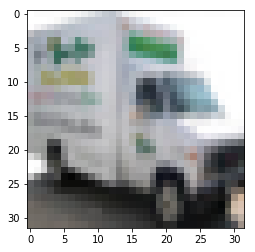

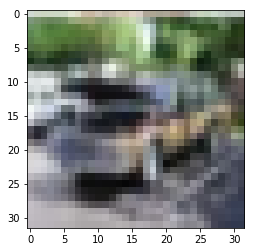

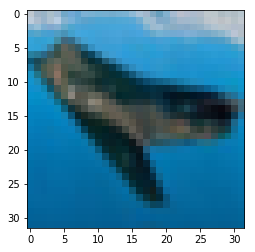

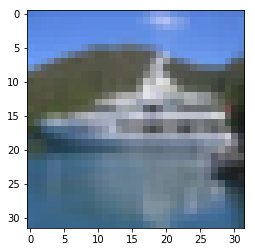

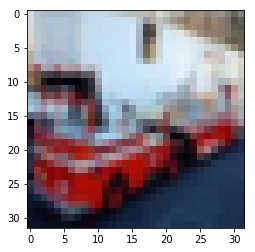

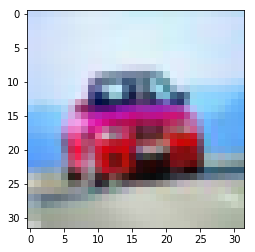

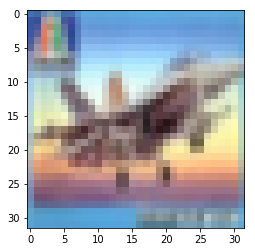

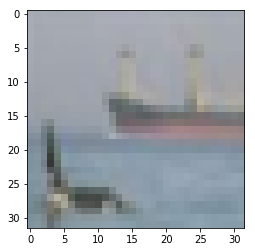

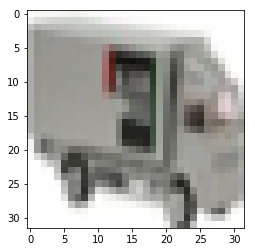

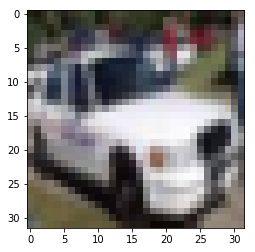

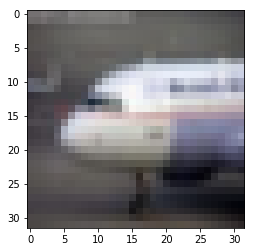

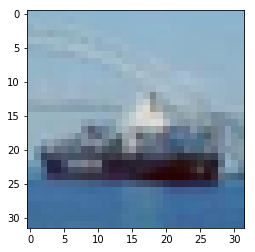

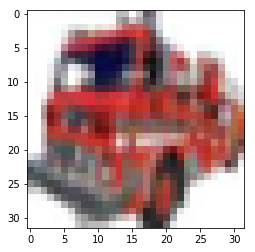

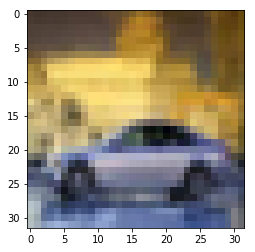

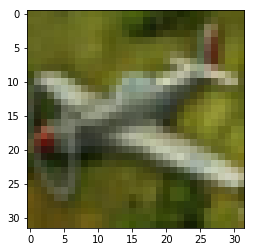

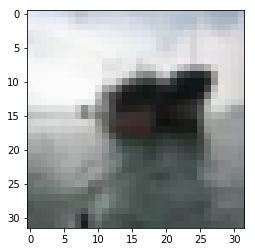

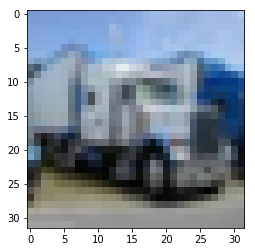

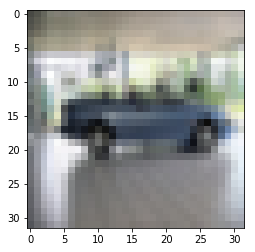

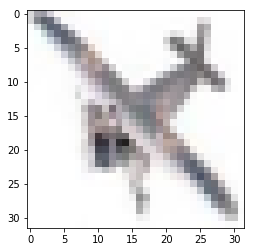

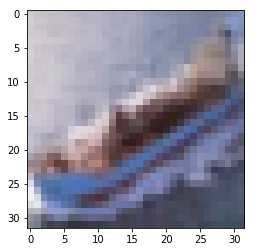

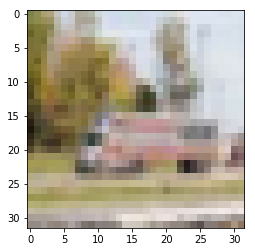

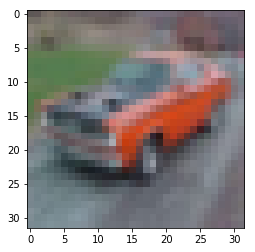

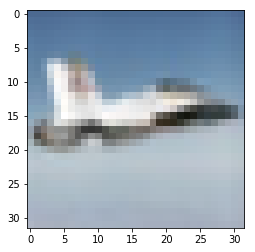

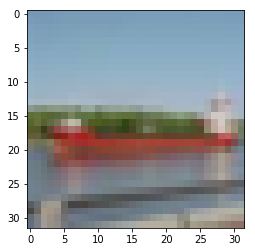

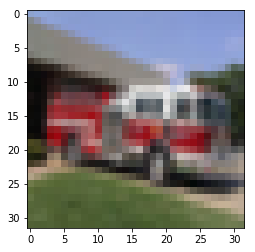

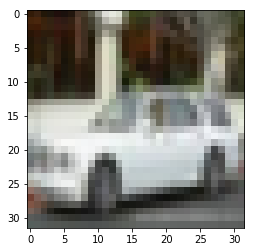

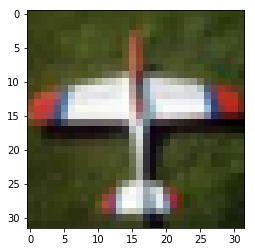

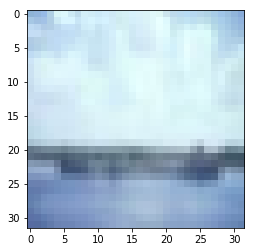

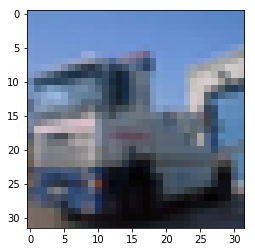

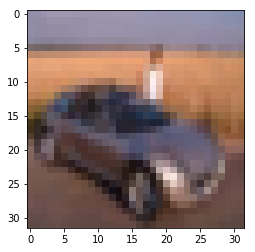

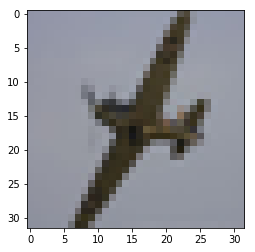

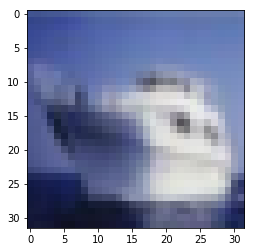

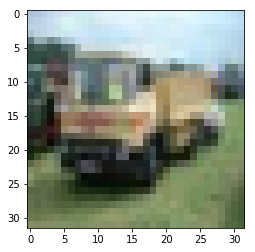

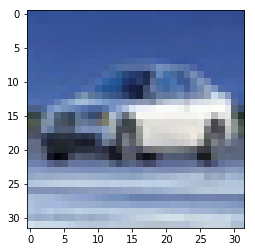

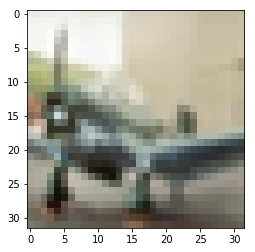

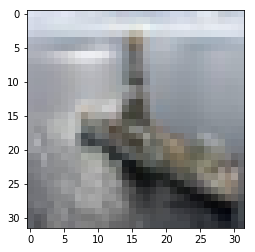

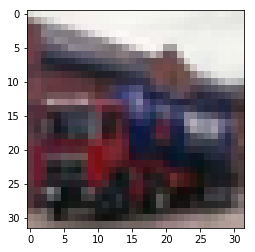

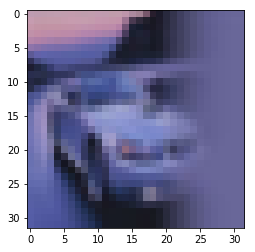

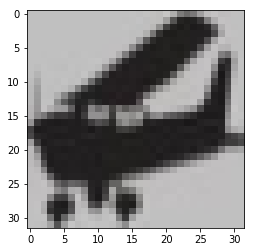

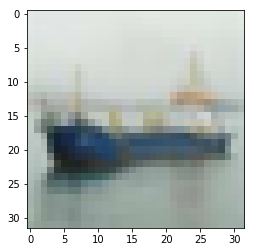

In [213]:
for i in range(10):
    for j in [truck_idx,car_idx,airplane_idx,ship_idx]:
        flat_img = X_pixels[j][i,:]
        img = flat_img.reshape(32,32,3)
        plt.imshow(img)
        plt.show()

Create a scree plot using OverFeat features 

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(X,)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [192]:
pve = pca.explained_variance_ratio_
pve

array([1.6782647e-01, 8.1929564e-02, 4.7569811e-02, ..., 5.6514391e-13,
       5.5790165e-13, 5.4128349e-13], dtype=float32)

In [193]:
pve_first2 = pve[0] + pve[1]
print(pve_first2)

0.24975604


The first two components explain 25% of the variance

In [237]:
# Find out how many compnents to retain to keep 80% variance
for i in range(len(pve)):
    x == 0
    x = x + pve[i]
    if x > 0.80:
        print(i)
        break

57


57 components are required to retain 80% of the cumulated PVE

In [240]:
for i in range(len(pve)):
    x == 0
    x = x + pve[i]
    if x > 0.9:
        print(i)
        break

163


163 components are required to retain 90% of the cumulated PVE

In [242]:
for i in range(len(pve)):
    x == 0
    x = x + pve[i]
    if x > 0.95:
        print(i)
        break

391


391 components are required to retain 95% of the cumulated PVE

In [244]:
for i in range(len(pve)):
    x == 0
    x = x + pve[i]
    if x > 0.99:
        print(i)
        break

1057


1057 components are required to retain 99% of the cumulated PVE

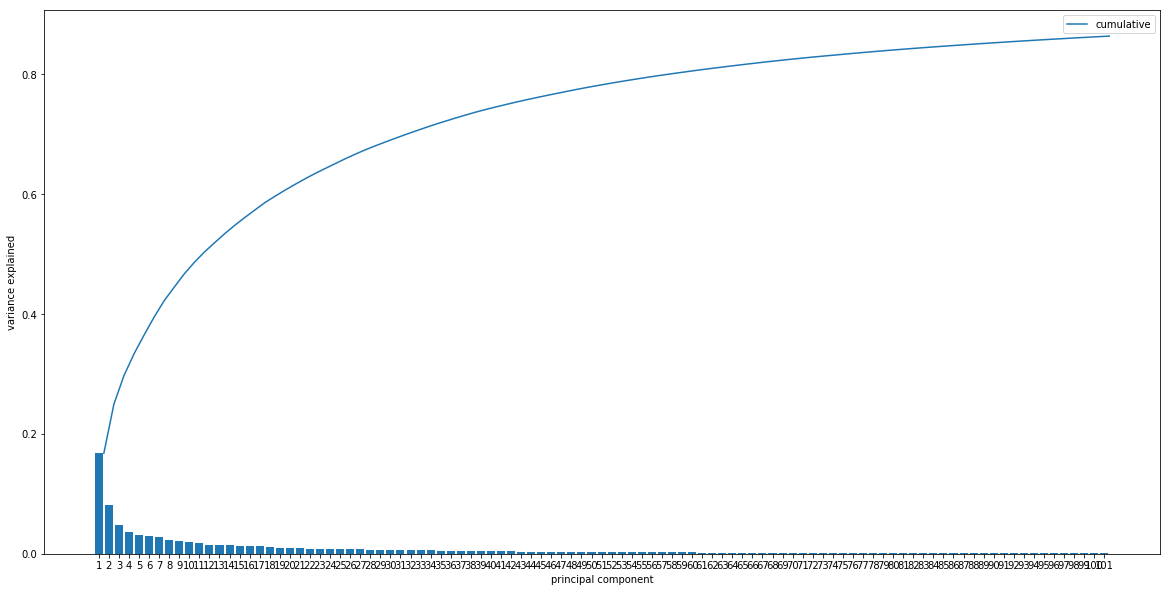

In [226]:
# create bar plot
pve_100 = pve[0:101]
plt.figure(figsize=(20,10))
xcor = np.arange(1, len(pve_100)+1) # 1,2,..,n_components
plt.bar(xcor, pve_100)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve_100)
plt.plot(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('variance explained')
plt.legend()
plt.show()

In [245]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

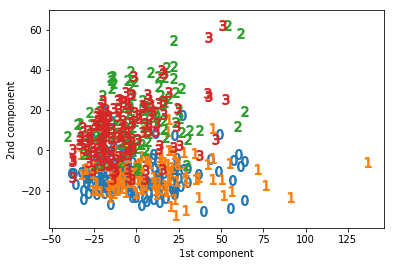

In [247]:
digits_components = pca.transform(X[:500])
digits_label = y[:500]

for label in range(4): 
    # Images of this digit
    idx = (digits_label == label)
    plt.scatter(
        digits_components[idx, 0], digits_components[idx, 1],
        marker="${}$".format(label),
        s=100 # Size of each marker
    )
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

airplanes and ships are more similar to each other. They occupy the same area. Trucks and cars are more similar together. The second component is critical in determine trucks, cars and airplanes, ships. 

In [248]:
pca = PCA(n_components=2)
pca.fit(X_pixels)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

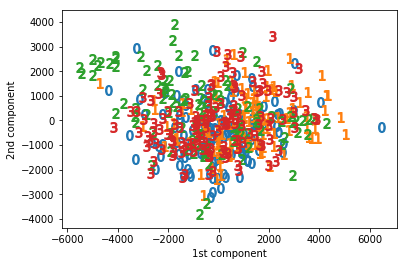

In [250]:
digits_components = pca.transform(X_pixels[:500])
digits_label = y[:500]

for label in range(4): 
    # Images of this digit
    idx = (digits_label == label)
    plt.scatter(
        digits_components[idx, 0], digits_components[idx, 1],
        marker="${}$".format(label),
        s=100 # Size of each marker
    )
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

There is no significant classification shown in this graph for labels.